In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [31]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [32]:

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_19728\673246437.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [33]:

cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
            'PaperlessBilling', 'PaymentMethod']
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [34]:

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [35]:

y = df_encoded['Churn'].map({'Yes': 1, 'No': 0}).values
X = df_encoded.drop(['customerID', 'Churn'], axis=1).values

In [36]:

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7481 - loss: 0.4904 - val_accuracy: 0.8092 - val_loss: 0.4177
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8003 - loss: 0.4400 - val_accuracy: 0.8066 - val_loss: 0.4117
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8076 - loss: 0.4018 - val_accuracy: 0.8004 - val_loss: 0.4109
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8104 - loss: 0.4074 - val_accuracy: 0.7968 - val_loss: 0.4120
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8050 - loss: 0.4085 - val_accuracy: 0.7959 - val_loss: 0.4111
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8115 - loss: 0.3981 - val_accuracy: 0.7950 - val_loss: 0.4167
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8231 - loss: 0.3906 - val_accuracy: 0.7986 - val_loss: 0.4074
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8014 - loss: 0.4067 - val_accuracy: 0.

In [40]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8141 - loss: 0.4135
Test Accuracy: 0.8176


In [41]:

y_pred = (model.predict(X_test) > 0.5).astype(int)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


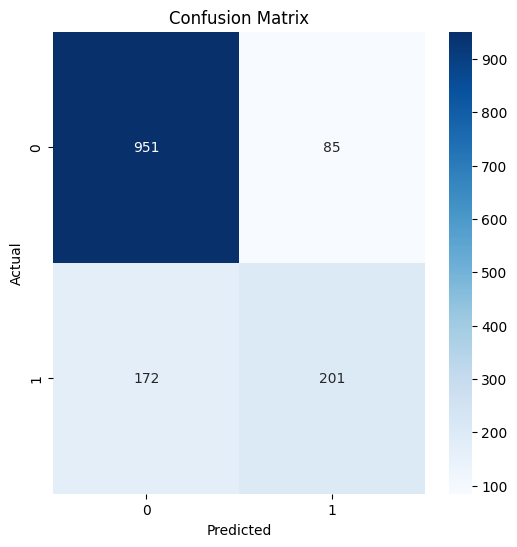

In [42]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


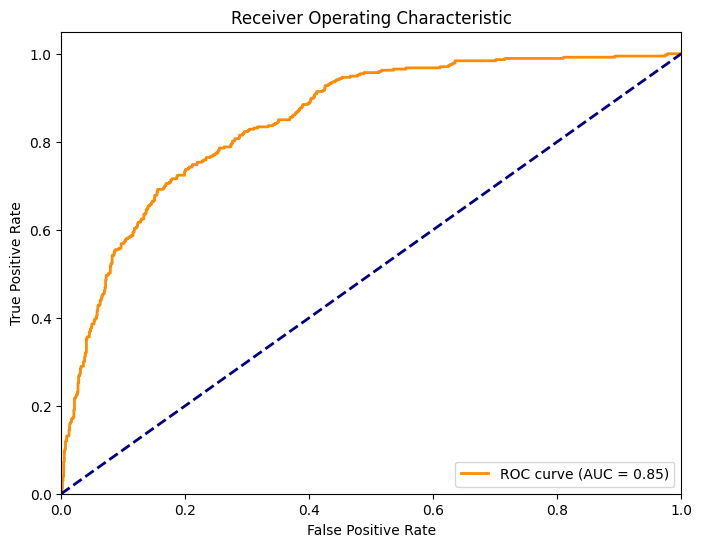

In [43]:

fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()